In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
dir = '/Users/signapoop/Desktop/autotune'
os.chdir(dir)
from autotune.core.HyperbandOptimiser import HyperbandOptimiser
from autotune.core.RandomOptimiser import RandomOptimiser

In [23]:
hyperband = []
random = []
n = 5

for i in range(1,n+1):

    problem_text = "cifar_9hps_" + str(i)
    path = '/Users/signapoop/Desktop/results/' + problem_text
    os.chdir(path)
    file = open("results.pkl",'rb')
    object_file = pickle.load(file)
    file.close()

    # Unpack file
    hyperband.append(object_file[0])
    random.append(object_file[1])

In [24]:
def predecessor_t(seq, t):
    assert seq[0] == 0, "First checkpoint must be 0"
    for i in range(len(seq)):
        if seq[i] > t:
            return i -1
    return i 

def value_at_time(opt, t):
    time_index = predecessor_t(opt.checkpoints, t)
    return opt.Y_best[time_index]

def augment_sequences(opt):
    opt.checkpoints.insert(0,0)
    opt.Y_best.insert(0,1)

In [25]:
# augments sequences, prepending checkpoint t=0, Y_best=1
for opt in hyperband: 
    augment_sequences(opt)

for opt in random: 
    augment_sequences(opt)

In [26]:
for h in hyperband:
    print(len(h.checkpoints))

13
13
13
13
13


In [27]:
for r in random:
    print(len(r.checkpoints))

18
18
14
19
21


In [28]:
seq = random[0].checkpoints
print(seq)
print(predecessor_t(seq, 4900))
print(value_at_time(random[0], 4900))

[0, 194.32330799102783, 528.8555710315704, 750.0965390205383, 1025.7612609863281, 1351.5884671211243, 1545.2633731365204, 1879.2532091140747, 2179.993893146515, 2426.513422012329, 2653.749006986618, 2978.5604310035706, 3228.538905143738, 3436.684720993042, 3917.765741109848, 4143.167211055756, 4354.643072128296, 4649.495290994644]
17
0.2168


In [29]:
def average_opt_results(optimisers):
    t_end = max([opt.checkpoints[-1] for opt in optimisers])
    print(t_end)
    t_seq = np.linspace(0, t_end, num=250)
    
    y_seq = np.zeros((len(optimisers),len(t_seq)))
    for i in range(len(optimisers)):
        for j in range(len(t_seq)):
            y_seq[i][j] = value_at_time(optimisers[i], t_seq[j])
    return t_seq, y_seq

In [30]:
random_t_seq, random_y_seq = average_opt_results(random)
print(random_y_seq.shape)
hyperband_t_seq, hyperband_y_seq = average_opt_results(hyperband)
print(hyperband_y_seq.shape)

4742.20981216
(5, 250)
4692.85442019
(5, 250)


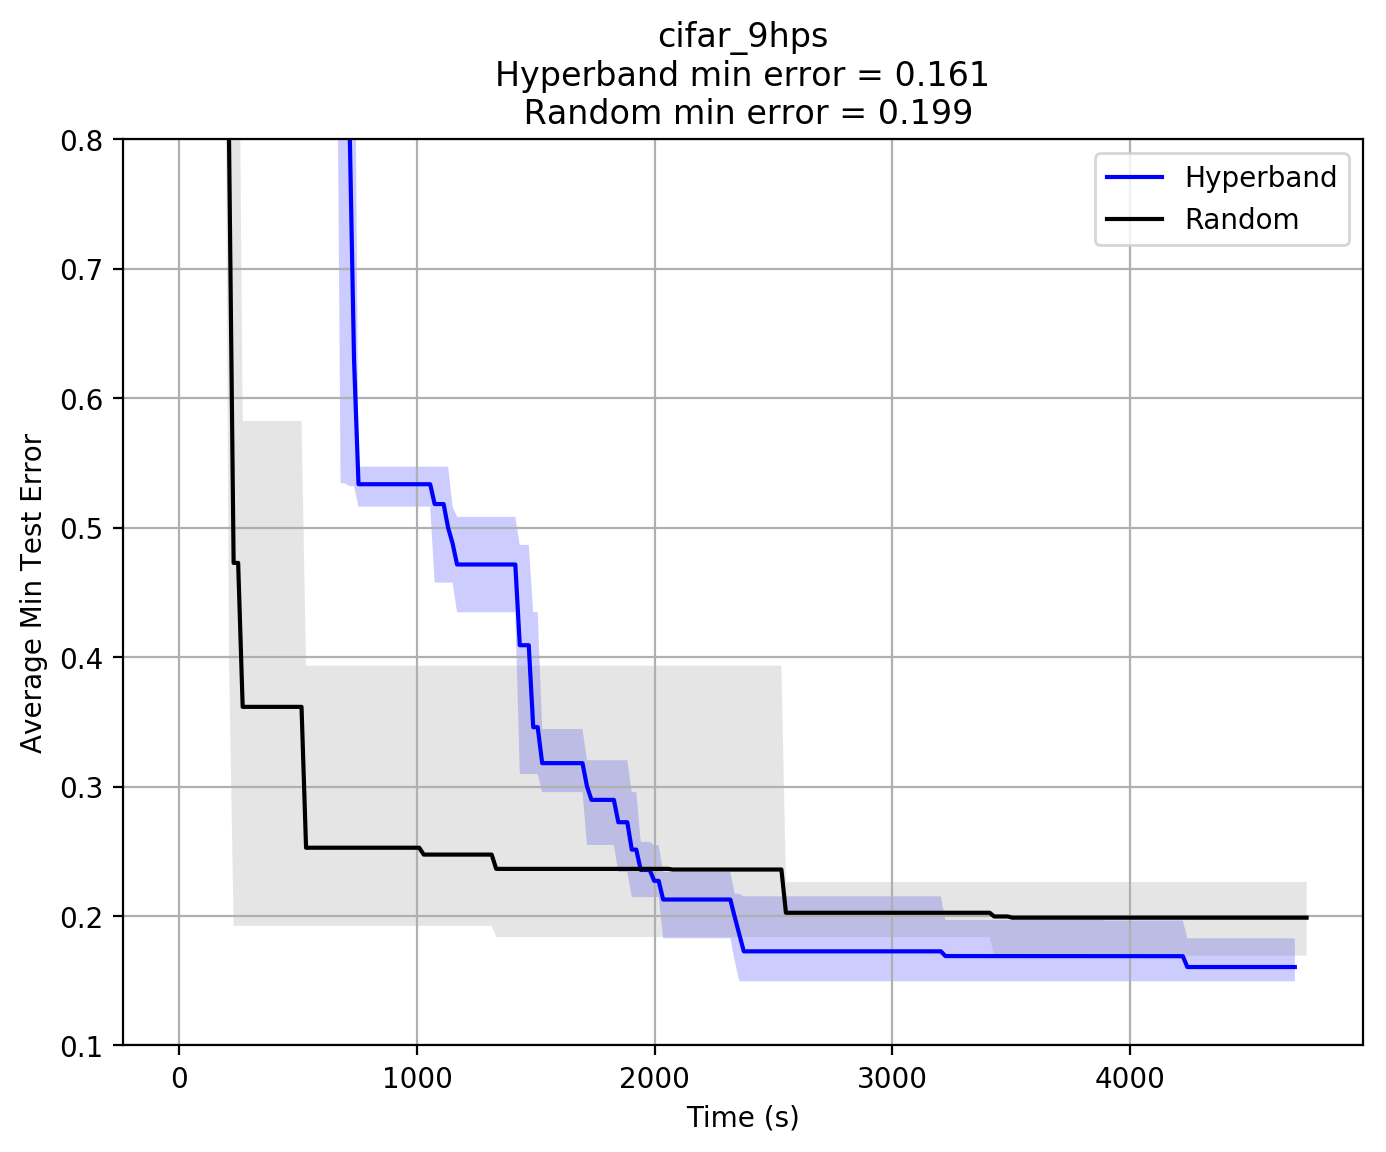

In [31]:
random_ave = np.average(random_y_seq, 0)
hyperband_ave = np.average(hyperband_y_seq, 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=200)
ax.plot(hyperband_t_seq, hyperband_ave, '-b', label="Hyperband")
ax.fill_between(hyperband_t_seq, np.min(hyperband_y_seq, 0), np.max(hyperband_y_seq, 0), facecolor='blue', alpha=0.2)

ax.plot(random_t_seq, random_ave, '-k', label="Random")
ax.fill_between(random_t_seq, np.min(random_y_seq, 0), np.max(random_y_seq, 0), facecolor='grey', alpha=0.2)
ax.set_ylim(0.1,0.8)

ax.grid()
plt.ylabel('Average Min Test Error')
plt.xlabel('Time (s)')
plt.legend()

problem_text = "cifar_9hps"

res = "Hyperband min error = {:.3f}\n Random min error = {:.3f}".format(min(hyperband_ave), min(random_ave))
title = problem_text + "\n" + res
plt.title(title)
    
plt.show()